In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
pathname='data/'

導入所需的庫和模塊
首先，我們需要導入一些需要的庫和模塊。在這種情況下，我們將使用 TensorFlow 庫來構建我們的神經網絡模型，並使用 Keras 庫中的相關模塊來加載和處理 CIFAR-10 數據集。

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


加載和準備 CIFAR-10 數據集
接下來，我們需要加載和準備 CIFAR-10 數據集。我們可以使用 Keras 提供的 cifar10.load_data() 函數來下載和加載 CIFAR-10 數據集。

In [3]:
x_train_normalize = x_train / 255.0
x_test_normalize = x_test / 255.0

y_train_OneHot = keras.utils.to_categorical(y_train, num_classes=10)
y_test_OneHot = keras.utils.to_categorical(y_test, num_classes=10)

print("train data:",'images:',x_train.shape,
      " labels:",y_train.shape) 
print("test  data:",'images:',x_test.shape ,
      " labels:",y_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


數據預處理
在構建神經網絡之前，我們需要對數據進行一些預處理。我們可以將圖像像素值縮放到 0 到 1 的範圍，並對標籤進行編碼。
使用了 Keras 的 to_categorical 函數將標籤數據轉換為 one-hot 編碼。

to_categorical 函數將整數類型的標籤轉換為對應的 one-hot 編碼表示。對於有 num_classes 個類別的分類問題，one-hot 編碼將標籤表示為一個長度為 num_classes 的向量，其中只有一個元素為 1，其餘元素都為 0，用於表示樣本所屬的類別。

In [10]:
model = Sequential()

#卷積層與池化層
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
#卷積層2與池化層2
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#卷積層3與池化層3
model.add(Conv2D(filters=256, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#分類器：平坦層、隱藏層、輸出層
model.add(Flatten())
model.add(Dense(1024, activation='relu')) #1024
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))


print(model.summary())



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 128)       36992     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 8, 8, 128)        

構建神經網絡模型 
現在，我們可以構建包含卷積層、池化層的神經網絡模型。我們使用 Sequential ，並添加 Dense 層作為模型的層級。
這裡的 Flatten 層將輸入的圖像數據展平為一維向量，以便與全連接層兼容。後面的2個 Dense 層分別包含 1024、10 個神經元，激活函數分別為 ReLU 和 softmax。

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


編譯和訓練模型並劃出示意圖
在訓練模型之前，我們需要編譯模型並指定損失函數、優化器和評估指標。
使用 fit 函數來訓練模型。我們使用了批量大小為 128，迭代次數為 10。我們還使用測試集作為驗證集來評估模型的性能。

In [20]:
train_history=model.fit(x_train_normalize, y_train_OneHot, batch_size=128, epochs=10, validation_split=0.2,verbose=1)


Epoch 1/10
313/313 [==============================] - 119s 371ms/step - loss: 1.6630 - accuracy: 0.3877 - val_loss: 1.3779 - val_accuracy: 0.5046
Epoch 2/10
313/313 [==============================] - 110s 350ms/step - loss: 1.2485 - accuracy: 0.5520 - val_loss: 1.1007 - val_accuracy: 0.6144
Epoch 3/10
313/313 [==============================] - 111s 356ms/step - loss: 1.0840 - accuracy: 0.6151 - val_loss: 0.9480 - val_accuracy: 0.6628
Epoch 4/10
313/313 [==============================] - 114s 363ms/step - loss: 0.9661 - accuracy: 0.6587 - val_loss: 0.8958 - val_accuracy: 0.6858
Epoch 5/10
313/313 [==============================] - 111s 354ms/step - loss: 0.8872 - accuracy: 0.6850 - val_loss: 0.8397 - val_accuracy: 0.7078
Epoch 6/10
313/313 [==============================] - 112s 358ms/step - loss: 0.8200 - accuracy: 0.7096 - val_loss: 0.7983 - val_accuracy: 0.7213
Epoch 7/10
313/313 [==============================] - 110s 351ms/step - loss: 0.7545 - accuracy: 0.7313 - val_loss: 0.7668 -

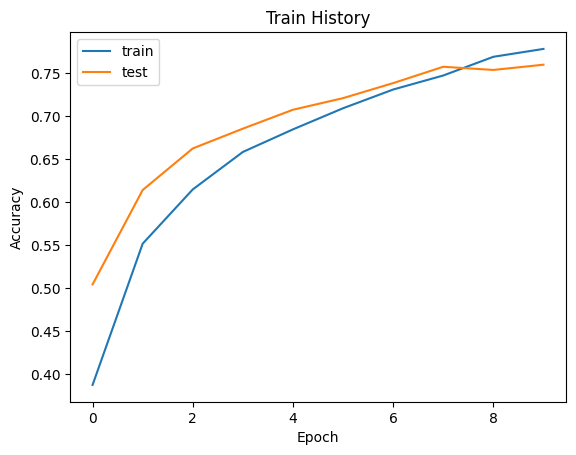

In [21]:
import matplotlib.pyplot as plt
def show_acc_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_acc_train_history('accuracy','val_accuracy')

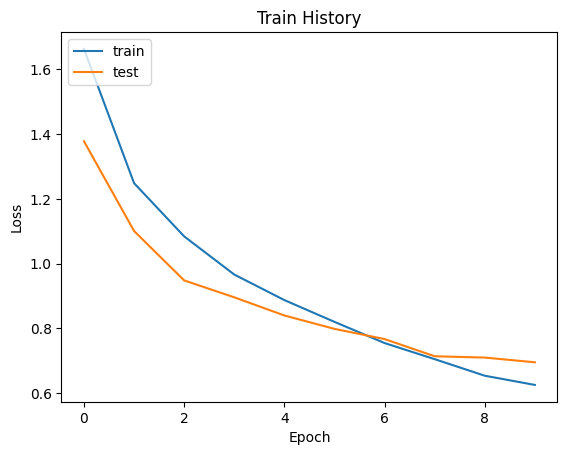

In [22]:
def show_loss_train_history(train_loss,test_loss):
    plt.plot(train_history.history[train_loss])
    plt.plot(train_history.history[test_loss])
    plt.title('Train History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
show_loss_train_history('loss','val_loss')

模型評估
在模型訓練完成後，我們可以使用測試集來評估模型的性能。

In [23]:
test_loss, test_accuracy = model.evaluate(x_test_normalize, y_test_OneHot)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


313/313 [==============================] - 8s 25ms/step - loss: 0.7042 - accuracy: 0.7552
Test Loss: 0.7041508555412292
Test Accuracy: 0.7552000284194946


進行預測 & 察看結果

In [24]:
scores = model.evaluate(x_test_normalize, 
                        y_test_OneHot, verbose=0)
scores[1]

prediction=np.argmax(model.predict(x_test_normalize), axis=-1)
prediction[:10]
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

313/313 [==============================] - 7s 23ms/step


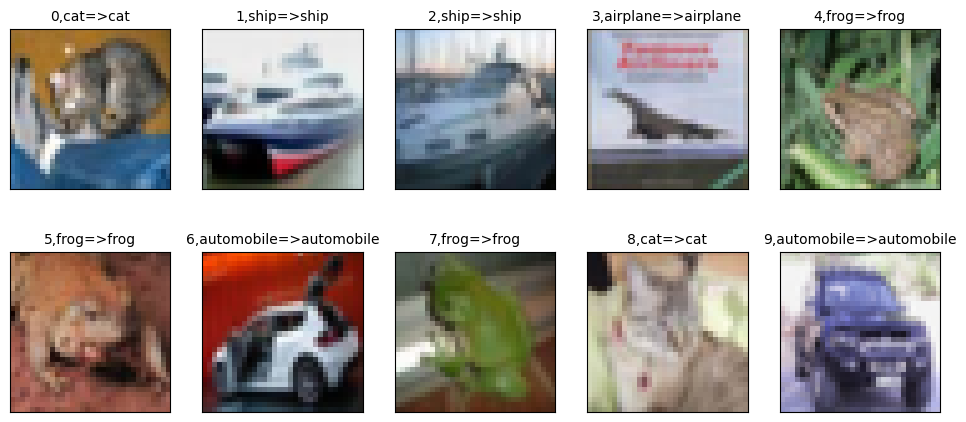

In [25]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

plot_images_labels_prediction(x_test,y_test,
                              prediction,0,10)



查看預測機率

313/313 [==============================] - 8s 25ms/step
label: cat predict: cat


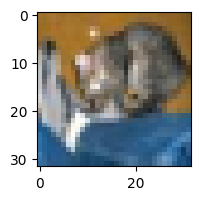

airplane Probability:0.001666852
automobile Probability:0.029238809
bird Probability:0.002986438
cat Probability:0.634657323
deer Probability:0.000352871
dog Probability:0.152584091
frog Probability:0.007065503
horse Probability:0.002345224
ship Probability:0.158503965
truck Probability:0.010598913
label: airplane predict: airplane


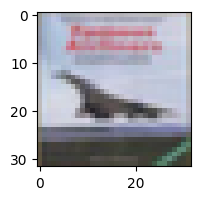

airplane Probability:0.937054157
automobile Probability:0.013860125
bird Probability:0.004832064
cat Probability:0.000373333
deer Probability:0.000820379
dog Probability:0.000006232
frog Probability:0.000036190
horse Probability:0.000008515
ship Probability:0.042642027
truck Probability:0.000367066


In [26]:
Predicted_Probability=model.predict(x_test_normalize)

def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))
        
show_Predicted_Probability(y_test,prediction,
                           x_test,Predicted_Probability,0)

show_Predicted_Probability(y_test,prediction,
                           x_test,Predicted_Probability,3)

# confusion matrix

In [27]:
prediction.shape
y_test.shape
y_test
y_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

使用了 pandas 庫中的 crosstab 函數來創建一個交叉表（或稱為列聯表），以對比測試集中真實標籤和模型的預測結果。
交叉表將真實標籤和預測結果進行對比，並以表格的形式顯示它們之間的關係。表的行表示真實標籤，表的列表示預測結果。交叉表的每個單元格表示真實標籤與預測結果的對應數量。

In [28]:
import pandas as pd
print(label_dict)

#將 y_test 轉換為一維數組，以適應交叉表的輸入要求
#rownames=['label'] 表示設置交叉表的行名稱為 'label'，用於表示真實標籤。
#colnames=['predict'] 表示設置交叉表的列名稱為 'predict'，用於表示預測結果。
pd.crosstab(y_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,788,21,61,10,4,1,9,10,64,32
1,14,886,6,5,1,1,8,1,26,52
2,53,4,711,38,61,23,72,17,14,7
3,19,9,108,574,48,89,84,28,15,26
4,25,5,93,44,678,15,58,68,11,3
5,14,4,88,209,45,534,46,41,12,7
6,3,7,45,43,14,6,863,5,13,1
7,14,4,52,41,45,26,6,798,4,10
8,34,23,13,6,2,2,4,2,896,18


# 結論 本模型的 Test Accuracy: 0.7552000284194946
# Test Loss: 0.7041508555412292